In [17]:
# canonical import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
piramides_df = pd.read_csv('pyramids.csv')

In [3]:
piramides_df.shape

(62, 16)

In [4]:
piramides_df.dropna()

,Pharaoh,Ancient name,Modern name,Dynasty,Site,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Volume (cu.m),Latitude,Longitude,Type,Lepsius,Material,Comment
28,Khentkawes,-,Step tomb of Khentkaus I,4,Giza,35.5,45.8,17.50,74.00,6.372,29.973306,31.135361,Step,LG100,Bedrock. Limestone,LG 100
33,Neferirkare Kakai,Personality (ba) of Neferirkare,Pyramid of Neferirkare,5,Abusir,72.0,72.0,52.00,53.13,257.25,29.895000,31.202500,Step,XXI,Limestone,Later converted to true type
57,Khendjer,-,Pyramid of Khendjer,13,South Saqqara,52.5,52.5,37.35,55.00,44.096,29.832222,31.223889,True,XLIV,Mudbrick,SIP


### Data Exploration

In [26]:
piramides_df['Type'].unique()

array(['Step', 'Smooth-faced', 'Bent', 'True', '-', 'Smooth-sided',
       'Mastaba', 'Cenotaph'], dtype=object)

In [5]:
piramides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pharaoh           62 non-null     object 
 1   Ancient name      62 non-null     object 
 2   Modern name       62 non-null     object 
 3   Dynasty           62 non-null     int64  
 4   Site              62 non-null     object 
 5   Base1 (m)         62 non-null     float64
 6   Base2 (m)         62 non-null     float64
 7   Height (m)        53 non-null     float64
 8   Slope (dec degr)  43 non-null     float64
 9   Volume (cu.m)     33 non-null     object 
 10  Latitude          62 non-null     float64
 11  Longitude         62 non-null     float64
 12  Type              62 non-null     object 
 13  Lepsius           44 non-null     object 
 14  Material          61 non-null     object 
 15  Comment           21 non-null     object 
dtypes: float64(6), int64(1), object(9)
memory usag

In [6]:
piramides_df.isna().sum()

Pharaoh              0
Ancient name         0
Modern name          0
Dynasty              0
Site                 0
Base1 (m)            0
Base2 (m)            0
Height (m)           9
Slope (dec degr)    19
Volume (cu.m)       29
Latitude             0
Longitude            0
Type                 0
Lepsius             18
Material             1
Comment             41
dtype: int64

In [7]:
piramides_df.describe()

,Dynasty,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Latitude,Longitude
count,62.000000,62.000000,62.000000,53.000000,43.000000,62.000000,62.000000
mean,6.403226,78.977581,78.463065,47.817547,57.121628,29.226241,31.319200
std,3.889708,54.685717,54.199409,34.198331,11.411212,1.497457,0.446828
min,3.000000,18.000000,18.000000,6.800000,33.000000,24.085556,30.828611
25%,4.000000,41.100000,44.750000,18.000000,51.920000,29.621458,31.136257
50%,5.000000,72.650000,72.650000,47.000000,53.130000,29.850834,31.212611
75%,8.000000,105.000000,105.000000,60.000000,56.785000,29.924281,31.221598
max,18.000000,230.300000,230.300000,146.600000,82.000000,30.470556,32.885278


In [8]:
piramides_df['Dynasty'].unique()

array([ 3,  4,  5,  6,  8, 12, 13, 18])

### Base Analisys

In [9]:
piramides_df.columns

Index(['Pharaoh', 'Ancient name', 'Modern name', 'Dynasty', 'Site',
       'Base1 (m)', 'Base2 (m)', 'Height (m)', 'Slope (dec degr)',
       'Volume (cu.m)', 'Latitude', 'Longitude', 'Type', 'Lepsius', 'Material',
       'Comment'],
      dtype='object')

In [10]:
piramides_df['Base1 (m)']

0     121.00
1     120.00
2      84.00
3     215.00
4      20.00
       ...  
57     52.50
58     78.75
59     45.00
60     40.00
61     52.50
Name: Base1 (m), Length: 62, dtype: float64

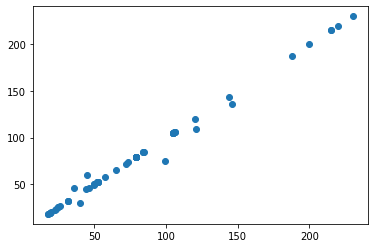

In [11]:
plt.scatter(piramides_df['Base1 (m)'], piramides_df['Base2 (m)'])

In [12]:
piramides_df[piramides_df['Base1 (m)'] != piramides_df['Base2 (m)']]

,Pharaoh,Ancient name,Modern name,Dynasty,Site,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Volume (cu.m),Latitude,Longitude,Type,Lepsius,Material,Comment
0,Djoser,Hiemlender,Step Pyramid of Djoser,3,Saqqara,121.0,109.0,60.0,NaN,330.4,29.871215,31.216644,Step,XXXII,Mudbrick,NaN
27,Shepseskaf,The Purified Pyramid,Mastabat al-Fir'aun,4,Giza,99.6,74.4,18.0,70.0,148.271,29.838889,31.215000,Step,NaN,Sandstone. Granite. Limestone,Mastaba
28,Khentkawes,-,Step tomb of Khentkaus I,4,Giza,35.5,45.8,17.5,74.0,6.372,29.973306,31.135361,Step,LG100,Bedrock. Limestone,LG 100
46,Khui,-,Pyramid of Khui,8,Dara,146.0,136.0,15.0,NaN,NaN,27.307778,30.871667,Step,NaN,Limestone,FIP
59,Neferhotep I,-,Tomb S9,13,Abydos,45.0,60.0,NaN,NaN,NaN,26.171389,31.925000,Mastaba,NaN,Mudbrick,SIP
60,Sobekhotep IV,-,Tomb S10,13,Abydos,40.0,30.0,NaN,NaN,NaN,26.171111,31.924167,Mastaba,NaN,Mudbrick,SIP


/Users/netoconcon/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dynasty', ylabel='count'>

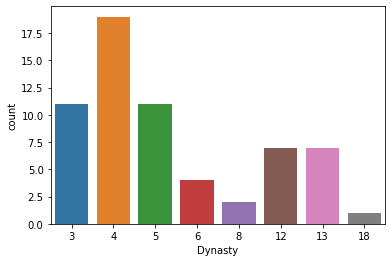

In [24]:
# piramides_df['Counter'] = 1
# piramides_df

sns.countplot(piramides_df.Dynasty)

### Dysnasty Analysis

In [14]:
plt.bar(dynasty_df['Dynasty'], dynasty_df['Counter']['sum'])

NameError: name 'dynasty_df' is not defined

In [ ]:
sns.boxplot(x="Dynasty", y="Height (m)", data=piramides_df)

In [ ]:
sns.boxplot(x="Dynasty", y="Base1 (m)", data=piramides_df)

In [ ]:
sns.boxplot(x="Dynasty", y="Slope (dec degr)", data=piramides_df)

In [ ]:
sns.catplot(x='Latitude', y='Height (m)', data=piramides_df)

In [ ]:
sns.catplot(x='Latitude', y='Slope (dec degr)', data=piramides_df)

<AxesSubplot:>

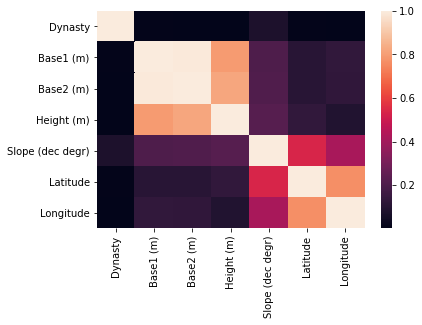

In [19]:
sns.heatmap(piramides_df.corr()** 2)

In [20]:
# fazer um one hot enconder das features categoricas


SyntaxError: invalid syntax (<ipython-input-20-d5ffa60f3866>, line 1)